# Ejercicio capitulo 3

##### 1. Minimos cuadrados


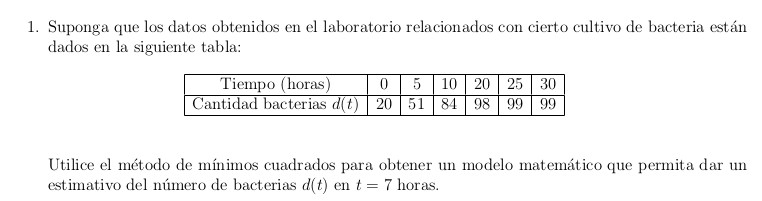



cantidad de bacterias en t=7  , : 55.33809523809524
cantidad de bacterias en t=45 , : 149.52380952380952
cantidad de bacterias en t=100, : 285.8452380952381


cantidad de bacterias en t=7  , : 55
cantidad de bacterias en t=45 , : 149
cantidad de bacterias en t=100, : 285


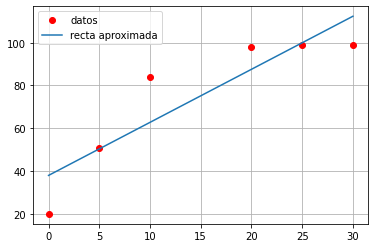

In [37]:
#importamos el modulos de numpy (numeric python)
import numpy as np

#importamos del módulo matplotlib la libreria pyplot con el alias de plt 
import matplotlib.pyplot as plt


#datos que queremos ajustar
Tiempo            = [0  ,  5, 10 ,20 , 25  , 30]
CantidadBacterias = [20 , 51, 84 ,98 ,99, 99]




#========================================================================
"""
Calculo de la pendiente (m) y el intercepto (b) de la regresion lineal

NOTA: VER EJERCICIO de Regresión lineal por minimos cuadrados del repositorio, unidad 3

para consistencia con el ejericio hacemos 

x = Tiempo            #variable independiente
y = CantidadBacterias #variable dependiente
 
"""


x = Tiempo  
y = CantidadBacterias

n = len(x)


#donde almacenaremos los valores de las sumas
suma_xi  = 0
suma_yi  = 0
suma_xixi= 0
suma_xiyi= 0
for i in range( n ):        
    suma_xi   += x[i]
    suma_yi   += y[i]
    suma_xixi += x[i]**2
    suma_xiyi += x[i]*y[i]

#aplicado las formulas
m = (n  * suma_xiyi      - suma_xi   * suma_yi) / (n * suma_xixi - suma_xi**2)
b = (suma_xixi * suma_yi - suma_xiyi * suma_xi) / (n * suma_xixi - suma_xi**2)
#========================================================================
 

#Para aproximar de bacterias para t=7, t=8, ....cualquier t, definimos una funcion lineal en base a los valores de m y b encontrados.
#--------------------------
def AproximacionLineal(x):
    return m * x + b
#--------------------------





#Asi podemos encontrar el numero de bacterias para cualquier t!
print("\n")
print("cantidad de bacterias en t=7  , :" , AproximacionLineal(7) )
print("cantidad de bacterias en t=45 , :" , AproximacionLineal(45) )   
print("cantidad de bacterias en t=100, :" , AproximacionLineal(100) )
print("\n")



#Podemos redondear los numeros a la parte entera
print("cantidad de bacterias en t=7  , :" ,  int( AproximacionLineal(7) )  )
print("cantidad de bacterias en t=45 , :" , int( AproximacionLineal(45) )  )   
print("cantidad de bacterias en t=100, :" , int(AproximacionLineal(100) )  )




######################OPCIONAL####################   
 
#--------------graficando---------------------------
#Graficando las parejas de datos
plt.plot(  Tiempo  , CantidadBacterias , "or" , label="datos" )


#Graficando la recta segun m y b 

#NOTA: toca pasar el argumento de AproximacionLineal a arreglo numpy! np.array(Tiempo)

TiempoNumpy = np.array(Tiempo)
plt.plot(  Tiempo ,  AproximacionLineal( TiempoNumpy ) , label="recta aproximada"  )


#mostrando las legendas del grafico
plt.grid()       
plt.legend()
    
#Mostrando el gráfico
plt.show()    

#####################################################
    

#### Pregunta Adicional (trabajo de estudiantes!)

Podria usar la interpolacion de Lagrange y optener el mismo resultado?

In [38]:


#Datos
Tiempo            = [0  ,  5, 10 ,20 , 25  , 30]
CantidadBacterias = [20 , 51, 84 ,98 , 99  , 99]


#para ser consistente con las definiciones 
x_datos = Tiempo  
y_datos = CantidadBacterias


#--------------------Recordar los polinomios de Lagrange----------------------------
#Definiendo los polinomios de lagrange Li(x)"""
def L( x , x_datos ,  i):
     
    #inicializamos a 1    
    Li = 1

    #hago la productoria
    for k in range( len( x_datos ) ): 
                
        #adiciono la restriccion de la productoria
        if k != i:
            Li  = Li * (x - x_datos[k]) / ( x_datos[i]- x_datos[k] )      

    return Li  
#--------------------------------------------------------------------------------------




#--------------------------------------    
#Definiendo el polinomio de interpolacion de Lagrange
def PolinomioLagrange(x):     
    Suma = 0 
    for i in range( len(x_datos) ):
        Suma = Suma + y_datos[i] * L( x , x_datos ,  i)   
    return Suma
#--------------------------------------


print("\n")
print("cantidad de bacterias en t=7  , :" , PolinomioLagrange(7) )
print("cantidad de bacterias en t=45 , :" , PolinomioLagrange(45) )   
print("cantidad de bacterias en t=100, :" , PolinomioLagrange(100) )
print("\n")








cantidad de bacterias en t=7  , : 66.04891199999999
cantidad de bacterias en t=45 , : -595.0
cantidad de bacterias en t=100, : -220254.0




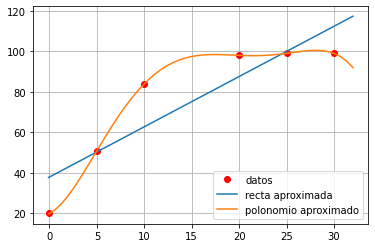

In [36]:
"""

 Graficando el polonomio interpolante de Lagrange y comparandolo con la aproxiacion lineal

"""

 
#Graficando las parejas de datos
plt.plot(  Tiempo  , CantidadBacterias , "or" , label="datos" )



t_continuo= np.linspace(-0.1 ,32, 50) 


#Graficando la regresion lineal
plt.plot(  t_continuo ,  AproximacionLineal( t_continuo ) , label="recta aproximada"  )


#Graficando el polonomio aproximado
plt.plot(  t_continuo ,  PolinomioLagrange( t_continuo ) , label="polonomio aproximado"  )


#mostrando las legendas del grafico
plt.grid()       
plt.legend()
    
#Mostrando el gráfico
plt.show()    

########################################################################



Conclusion: la interpolacion y la regresion no dan necesariamente el mismo resultado!